In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [7]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities      ...       ScreenPorch PoolArea PoolQC  Fence  \
0         Lvl    AllPub      ...               120        0    NaN  MnPrv   
1         Lvl    AllPub      ...                 0        0    NaN    NaN   
2         Lvl    AllPub      ...                 0        0    NaN  MnPrv   
3         Lvl    AllPub      ...                 0        0    NaN    NaN   
4         HLS    AllPub      ...               144        0    NaN    NaN   

  MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0      6    2010        WD         Normal  
1        Gar2   12500      6    2010        WD         Normal  
2         NaN       0      3    2010        WD         Normal  
3         NaN       0      6    2010        WD         Normal  
4         NaN       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [8]:
#loc(rows,coulums)


all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))
all_data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig      ...       ScreenPorch PoolArea PoolQC  \
0         Lvl    AllPub    Inside      ...                 0        0    NaN   
1         Lvl    AllPub       FR2      ...                 0        0    NaN   
2         Lvl    AllPub    Inside      ...                 0        0    NaN   
3         Lvl    AllPub    Corner      ...                 0        0    NaN   
4         Lvl    AllPub       FR2      ...                 0        0    NaN   

  Fence MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0   NaN         NaN       0       2    2008        WD         Normal  
1   NaN         NaN       0       5    2007        WD         Normal  
2   NaN         NaN       0       9    2008        WD         Normal  
3   NaN         NaN       0       2    2006        WD        Abnorml  
4   NaN         NaN       0      12    2008        WD         Normal  

[5 rows x 79 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a12b78198>,
      dtype=object)

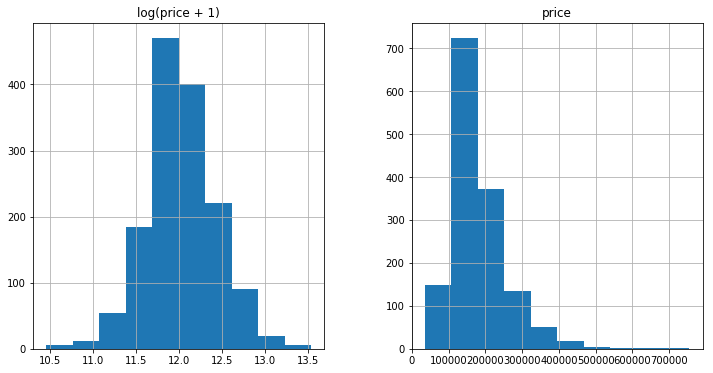

In [12]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)## 设置figure_size尺寸
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()

In [47]:
#log transform the target(//when you log transform features, do not forget transform corresponding lable):
train["SalePrice"] = np.log1p(train["SalePrice"])


#log transform skewed numeric features:
#return the index of all features dtypes are "object"
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index


#dropna():Remove missing values
#skewed_feats skew of colunms(index above)
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness

skewed_feats = skewed_feats[skewed_feats > 0.75]
#skewed_feats
skewed_feats = skewed_feats.index
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])


KeyError: "Index(['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',\n       'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'Alley_Grvl', 'Alley_Pave',\n       'LotShape_IR1',\n       ...\n       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',\n       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',\n       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',\n       'SaleCondition_Partial'],\n      dtype='object', length=252) not in index"

In [44]:

all_data = pd.get_dummies(all_data)
all_data.head()


MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    0.676766     0.679708  0.786626            7            5       2003   
1    0.628272     0.687038  0.788360            6            8       1976   
2    0.676766     0.681337  0.790472            7            5       2001   
3    0.682373     0.676766  0.788290            7            5       1915   
4    0.676766     0.688700  0.793544            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2          ...            \
0          2003    0.714447    0.744910         0.0          ...             
1          1976    0.000000    0.751463         0.0          ...             
2          2002    0.709124    0.736870         0.0          ...             
3          1970    0.000000    0.717071         0.0          ...             
4          2000    0.729274    0.743343         0.0          ...             

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                      0                      0                     0   
1                      0                      0                     0   
2                      0                      0                     0   
3                      1                      0                     0   
4                      0                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 288 columns]

In [36]:
all_data['YearBuilt']

0       2003
1       1976
2       2001
3       1915
4       2000
5       1993
6       2004
7       1973
8       1931
9       1939
10      1965
11      2005
12      1962
13      2006
14      1960
15      1929
16      1970
17      1967
18      2004
19      1958
20      2005
21      1930
22      2002
23      1976
24      1968
25      2007
26      1951
27      2007
28      1957
29      1927
        ... 
1429    1925
1430    1957
1431    1945
1432    1951
1433    1916
1434    2005
1435    2004
1436    1979
1437    1978
1438    2001
1439    1975
1440    1958
1441    2000
1442    2005
1443    2005
1444    1951
1445    1997
1446    1977
1447    1968
1448    1970
1449    1970
1450    1972
1451    1969
1452    1970
1453    1970
1454    1970
1455    1970
1456    1960
1457    1992
1458    1993
Name: YearBuilt, Length: 2919, dtype: int64

In [34]:
#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

In [43]:
#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice
y

0       0.221972
1       0.221869
2       0.222023
3       0.221672
4       0.222104
5       0.221689
6       0.222249
7       0.221941
8       0.221614
9       0.221539
10      0.221612
11      0.222330
12      0.221694
13      0.222183
14      0.221760
15      0.221627
16      0.221720
17      0.221322
18      0.221770
19      0.221667
20      0.222290
21      0.221669
22      0.222043
23      0.221614
24      0.221745
25      0.222121
26      0.221643
27      0.222247
28      0.221968
29      0.221096
          ...   
1430    0.221912
1431    0.221693
1432    0.221045
1433    0.221889
1434    0.221774
1435    0.221838
1436    0.221556
1437    0.222423
1438    0.221724
1439    0.221930
1440    0.221907
1441    0.221722
1442    0.222256
1443    0.221559
1444    0.221861
1445    0.221609
1446    0.221764
1447    0.222074
1448    0.221498
1449    0.221340
1450    0.221650
1451    0.222202
1452    0.221699
1453    0.221271
1454    0.221883
1455    0.221842
1456    0.221977
1457    0.2221